In [1]:
import ugradio
import numpy as np
import matplotlib.pylab as plt
import inspect
import collections

In [2]:
pwd = '/home/zoeko/astro121lab/lab1/data_sec5/'

def freq_to_period(freq):
    '''take frequency (in kHz)
    and converts to period (in microseconds)'''
    return (1/freq) * 1000

## 5.5
Generated two signals with frequencies: 700 and 701 kHz, both with 100 mVpp (passed through attenuator before going into SDR)
Sample frequencies: 1000 - 3200 kHz with a step size of 200 kHz

Default anti-aliasing filter is on.

### Data Naming Convention: two_freq{FREQ}.npy, where FREQ = sample frequency in kHz

In [3]:
# range of samp frequencies
samp_freqs = np.arange(1000, 3400, 200)

# array containing the voltage outputs for all the different frequencies
two_freq_data = np.array([])
for freq in samp_freqs:
    fname = f'{pwd}two_freq{freq}.npy'
    data = np.load(fname)
    two_freq_data = np.append(two_freq_data, data)
two_freq_data = two_freq_data.reshape(12, 2048)

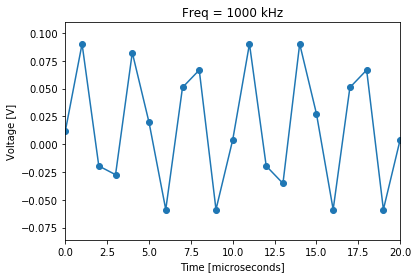

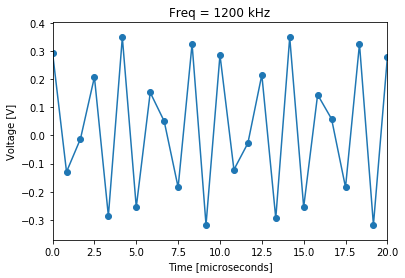

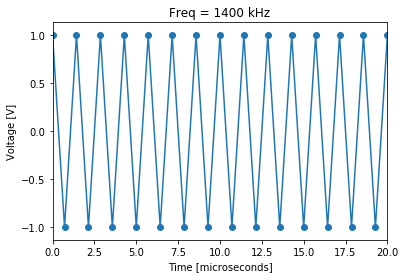

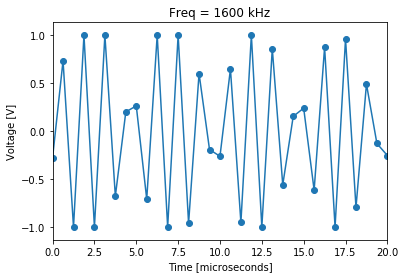

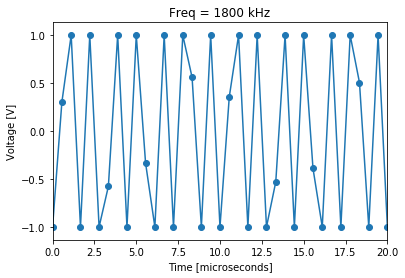

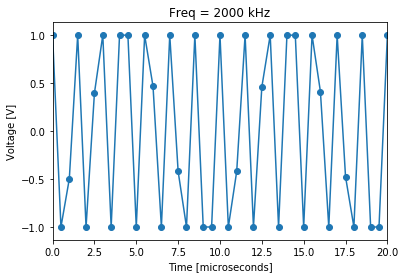

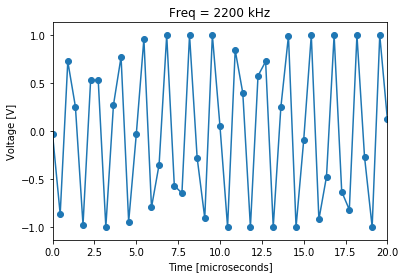

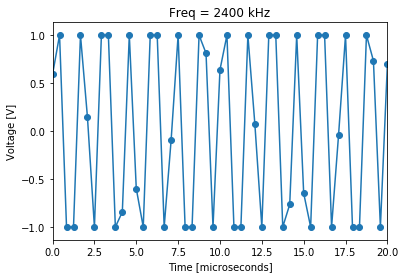

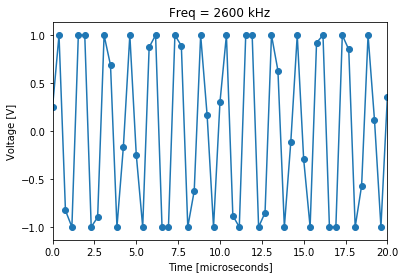

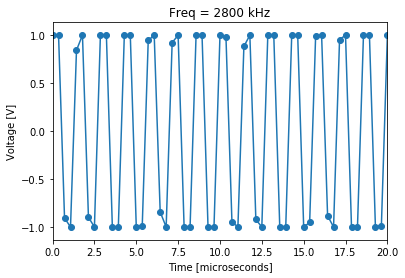

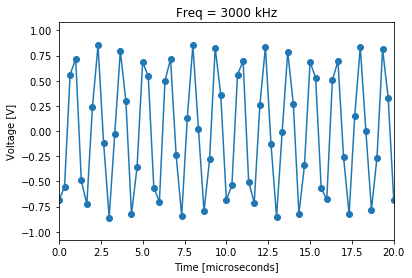

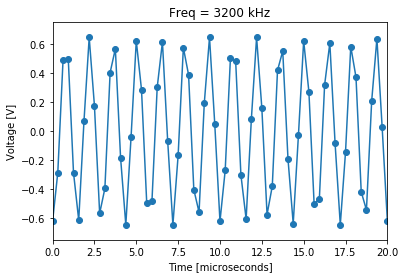

In [4]:
for i in np.arange(len(two_freq_data)):
    freq = samp_freqs[i]
    data = two_freq_data[i]
    time = np.arange(len(data)) * freq_to_period(freq) # in microseconds
    
    plt.figure()
    plt.plot(time, data)
    plt.scatter(time, data)
    plt.xlim(0, 20)
    plt.title('Freq = ' + str(freq) + ' kHz')
    plt.xlabel('Time [microseconds]')
    plt.ylabel('Voltage [V]')
    plt.show()

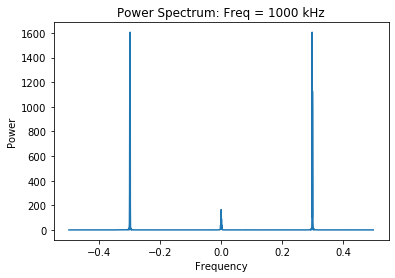

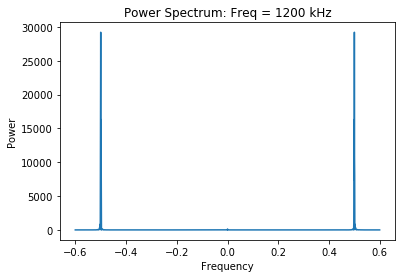

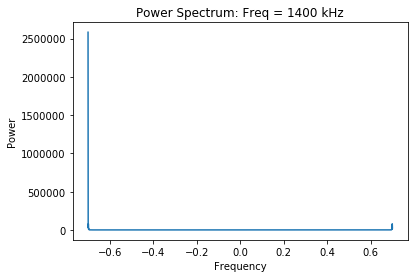

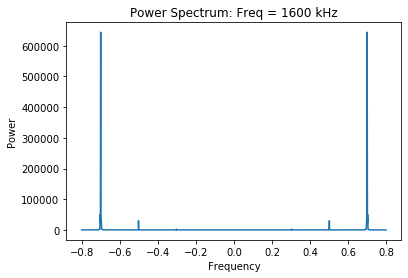

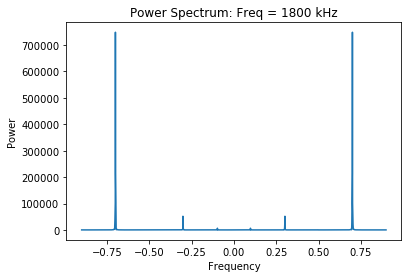

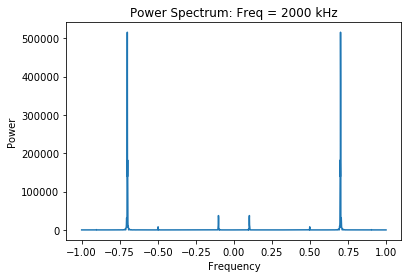

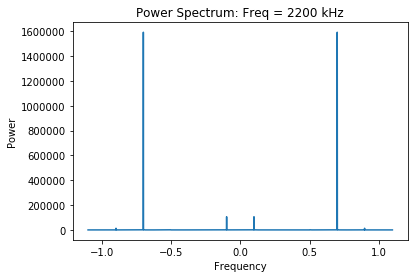

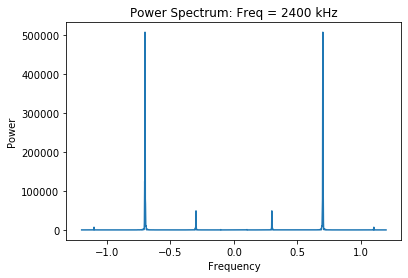

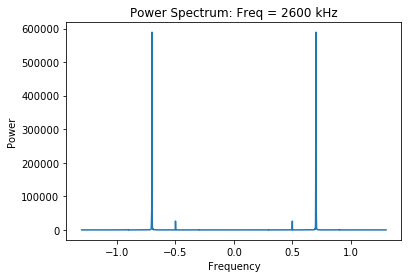

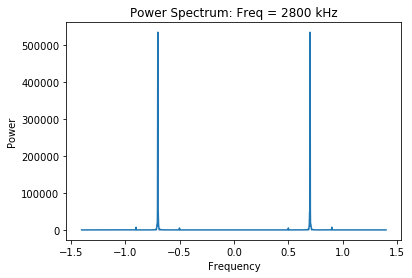

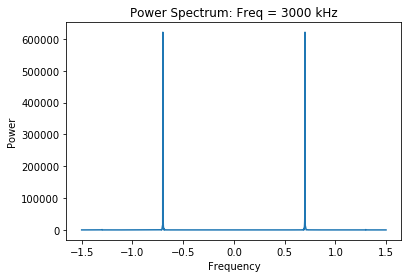

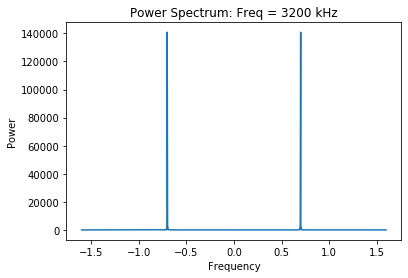

In [5]:
for i in np.arange(len(two_freq_data)):
    freq = samp_freqs[i]
    data = two_freq_data[i]
    time = np.arange(len(data)) * freq_to_period(freq) # in microseconds
    
    f, Fx = ugradio.dft.dft(data, vsamp=freq/1000)
    
    plt.figure()
    plt.plot(f, np.abs(Fx)**2)
#     plt.xlim(0.65, 0.75)
#     plt.ylim(0, 10)
    plt.title('Power Spectrum: Freq = ' + str(freq) + ' kHz')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.show()

## 5.6

Generated signal frequencies: 400, 1200, 2000, 2800, 3600 kHz (the center of each of the five Nyquist zones)
Sample frequency: 1600 kHz

Default anti-aliasing filter is off.

### Data Naming Convention: nyq_zones_{FREQ}.npy, where FREQ = SIGNAL frequency in kHz

In [6]:
# range of signal frequencies
sig_freqs = np.arange(400, 3800, 800)

# array containing the voltage outputs for all the different frequencies
nyq_zone_data = np.array([])
for freq in sig_freqs:
    fname = f'{pwd}nyq_zones_{freq}.npy'
    data = np.load(fname)
    nyq_zone_data = np.append(nyq_zone_data, data)
nyq_zone_data = nyq_zone_data.reshape(5, 2048)

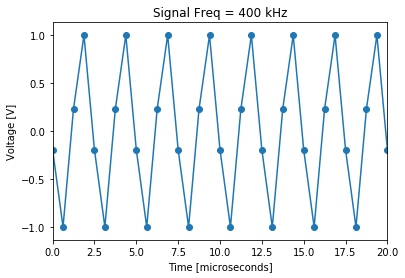

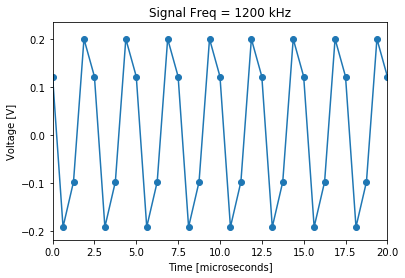

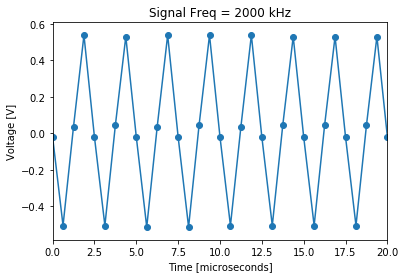

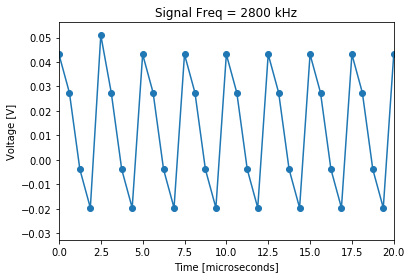

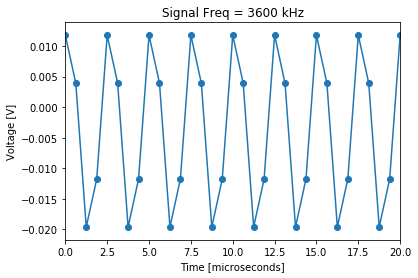

In [7]:
samp_freq = 1600

for i in np.arange(len(nyq_zone_data)):
    freq = sig_freqs[i]
    data = nyq_zone_data[i]
    time = np.arange(len(data)) * freq_to_period(samp_freq) # in microseconds
    
    plt.figure()
    plt.plot(time, data)
    plt.scatter(time, data)
    plt.xlim(0, 20)
    plt.title('Signal Freq = ' + str(freq) + ' kHz')
    plt.xlabel('Time [microseconds]')
    plt.ylabel('Voltage [V]')
    plt.show()

## 5.7: Exploring Noise

Noise generator (attenuator dial set to 0)
Fed into low pass filter (10 MHz) and then attenuator and then into SDR
nsample = default (2048)
nblocks = 1000

Sample frequency: 3200 kHz

Default anti-aliasing filter is on.

### Data Naming Convention: all_noise.npy

In [1]:
fname = f'{pwd}all_noise.npy'
all_noise = np.load(fname)
freq = 3200
time = np.arange(len(data)) * freq_to_period(freq) # in microseconds

NameError: name 'pwd' is not defined